<div style="text-align: right"> 29.11.2019</div>

***Name:*** 

# Hausaufgabe Blatt 6

## Mathematisches Pendel

In dieser Aufgabe werden wir die Bewegungsgleichung eines (mathematischen) Pendels numerisch lösen. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Um diese Gleichung numerisch lösen zu können, werden wir die gegeben Differentialgleichung zweiter Ordnung in zwei Differentialgleichungen erster Ordnung überführen:

\begin{align*}
        \dot \varphi &= \omega \tag{1}\\
        \dot \omega &= -\frac{g}{L} \sin  \varphi.  \tag{2}
\end{align*}

Bevor wir die Gleichungen (1) und (2) numerisch lösen können, müssen wir diese diskretisieren. Wie auf Aufgabenblatt 3 werden wir dazu das Euler Verfahren benutzen. Hier wird die Ableitung nach der Zeit durch kleine diskrete Änderungen in der Zeit $\Delta t$ approximiert. 

\begin{align*}
\dot \varphi &= \frac{\mathrm{d}\varphi}{\mathrm{d}t}\approx \frac{\Delta \varphi}{\Delta t} \\
\dot \omega &= \frac{\mathrm{d}\omega}{\mathrm{d}t}\approx \frac{\Delta \omega}{\Delta t} \\
\end{align*}

Umstellen der Gleichungen führt zu:
\begin{align*}
\Delta \varphi &= \omega \cdot \Delta t \\
\Delta \omega &= -\frac{g}{L} \sin  \varphi \cdot \Delta t.\\
\end{align*}

Dies sind die diskreten Änderungen im Winkel $\Delta \varphi$ und der Winkelgeschwindigkeit $\Delta \omega$ in nach einem Zeitschritt $\Delta t$.

Um also den neuen Winkel $\varphi\left(t+\Delta t\right)$ zum Zeitpunkt $t+\Delta t$ berechnen zu können, muss man lediglich die diskrete Änderung $\Delta \varphi$ auf den alten Winkel $\varphi\left(t\right)$ zum Zeitpunkt $t$ addieren (auch *update step* genannt). Gleiches gilt auch für die Winkelgeschwindigkeit $\omega$. Man erhält die nach dem Euler Verfahren diskretisierten Gleichungen:

\begin{align*}
    \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + \omega\left(t\right) \cdot \Delta t \tag{3}  \\
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{4}
\end{align*}

Wie Sie hier erkennen können, hängt die rechte Seite der obigen Gleichungen lediglich von $t$ (alter Zeitpunkt) und nicht von $t+\Delta t$ (neuer Zeitpunkt) ab.
### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (3 + 4) numerisch für $N=3000$ Zeitschritte, wobei $\Delta t=0.002$, $\omega(t=0)=0$ und $ \varphi_0 = \varphi(t=0)=\pi/4 $ sein soll. Wählen Sie für die Länge des Pendels $L=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()` (in (b)), `np.sin()`

In [1]:
#Numpy array importieren
import numpy as np

#Definieren der Anfangswerte
t0 = 0
deltat = 0.002
g = 9.81
L = 1
N = 3000

phi=np.pi/4
w=0

resultsphi = [np.pi/4]
resultsw = [0]


for i in range (1, N): #Schleife
        phi = phi + w*deltat
        resultsphi.append(phi)
        w = w - g/L*np.sin(phi)*deltat
        resultsw.append(w)

**b)** Plotten Sie den Winkel des Pendels abhängig von der Zeit. Vergleichen Sie das Ergebnis mit der analytischen Lösung durch Kleinwinkelnäherung:

\begin{equation*}
\varphi\left(t\right) = \varphi_0 \cos \left( \sqrt{(g/L)} \cdot t \right).
\end{equation*}


Benutzen Sie angemessene Beschriftungen und Legenden. Was fällt Ihnen beim Vergleich auf?

*Tipp:* Benutzen Sie zum Erstellen des Zeit arrays anstelle von `np.linspace()` dieses Mal `np.arange(start, stop, width)`. Dabei wird ein array mit den Grenzen `[start, stop)` erstellt und der Abstand zwischen zwei konsekutiven Werten ist durch `width` gegeben.


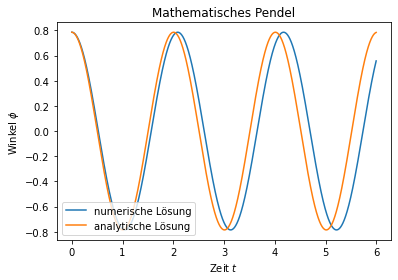

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Diagramm plotten
fig, ax = plt.subplots()
ax.set_title("Mathematisches Pendel")  # Titel


#Definieren von "listet" für die Zeit t
deltat = 0.002
N=3000
listet = [] #leere Liste
for i in range (0, N): #Schleife
    t = deltat * i #Befehl für die Schleife
    listet.append(t) #Ergebnis der Rechnung an die Liste anhägen
#Numerische Lösung
ax.plot(listet, resultsphi, label='numerische Lösung') 

#Analytische Lösung
phi0=np.pi/4
t = np.arange(0, 6, deltat)
phit = phi0 * np.cos(np.sqrt(g/L)*t)

ax.plot(t, phit, label='analytische Lösung')

ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $\phi$")

plt.legend(loc=3)
plt.show()

Mir fällt beim Vergleich auf: 
- Die Kurve der numerischen Lösung weicht für größere Zeitschritte t immer weiter von der analytischen Lösung ab, da bei der numerischen Integration immer vom vorigen Wert ausgegangen wird und sich der Fehler somit fortpflanzt.
Hierbei bleibt der Wert der minimalen bzw. maximalen Amplitude ungefähr gleich groß, die numerisch berechneten Schwingungen sind aber zunehmend zeitversetzt zur analytischen Lösung.

**c)** Wiederholen Sie die Schritte **a)** und **b)** für $\varphi_0 = \pi/16.$ Was beobachten Sie?

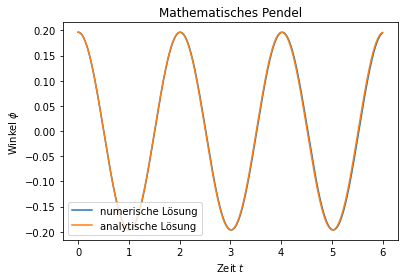

In [3]:
#Numpy array importieren
import numpy as np

#Definieren der Anfangswerte
t0 = 0
deltat = 0.002
phi02=np.pi/16
g = 9.81
L = 1
N = 3000


phi2=np.pi/16
w2=0

resultsphi2 = [np.pi/16]
resultsw2 = [0]


for i in range (1, N): #Schleife
        phi2 = phi2 + w2*deltat
        resultsphi2.append(phi2)
        w2 = w2 - g/L*np.sin(phi2)*deltat
        resultsw2.append(w2)

#Diagramm plotten
fig, ax = plt.subplots()
ax.set_title("Mathematisches Pendel")

#Numerische Lösung
ax.plot(listet, resultsphi2, label='numerische Lösung') 

#Analytische Lösung
t = np.arange(0, 6, deltat)
phit = phi02 * np.cos(np.sqrt(g/L)*t)

ax.plot(t, phit, label='analytische Lösung')

ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $\phi$")

plt.legend(loc=3)
plt.show()

Ich beobachte:
- Mit einem kleineren Auslenkwinkel Phi0 ist die numerische Integration deutlich genauer. Erst nach mehreren Schwingungen ist der Fehler im Vergleich zur analytischen Lösung in der Abbildung zu erkennen.